# Import

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from random import randint
import random

In [2]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

def get_file_name(path):
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname

def rgb_display(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
data_type = "train"
image_src = glob.glob(f"../datasets/waymo/data/{data_type}/*.jpg")
anno_src = glob.glob(f"../datasets/waymo/data/waymo_{data_type}_GT/*.txt")
print(len(image_src), len(anno_src))

79735 65454


tr02-18-12-3-FRONT_RIGHT
(1280, 1920, 3)


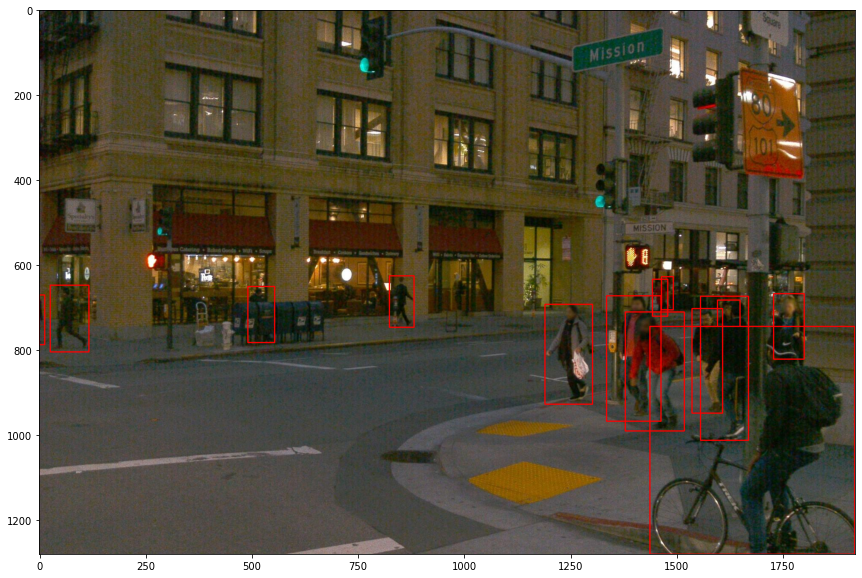

In [9]:
index = randint(0, len(anno_src)-1)
img_name = get_file_name(anno_src[index])

# img_name = "tr20-25-7-2-FRONT_LEFT"
print(img_name)

image = plt.imread(f"../datasets/waymo/data/{data_type}/{img_name}.jpg")
gt_boxes = file_lines_to_list(f"../datasets/waymo/data/waymo_{data_type}_GT/{img_name}.txt")

dummy = image.copy()

for obj in gt_boxes:
    cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (255, 0, 0), thickness = 2)

plt.figure(figsize=(16,10))
plt.imshow(dummy)
print(image.shape)
plt.show()

# Cutout

tr12-20-4-3-FRONT_RIGHT
(1280, 1920, 3)


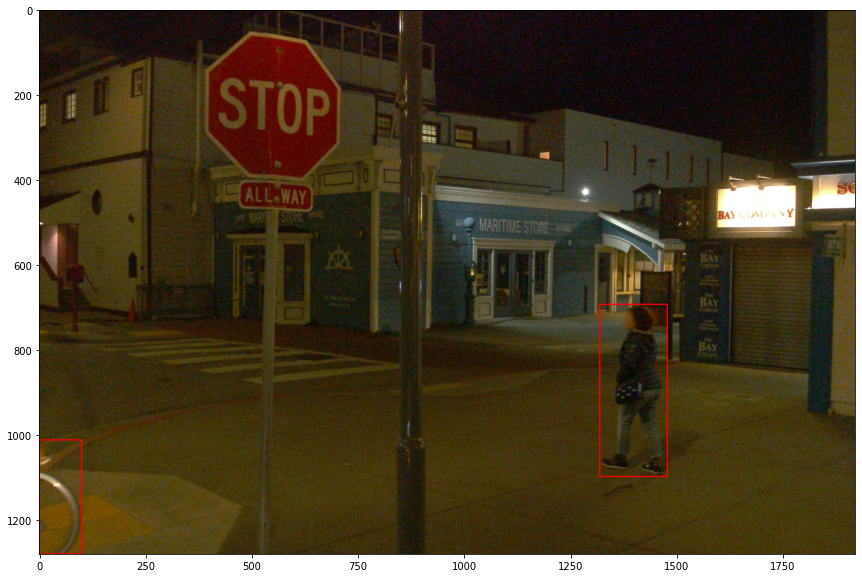

In [41]:
index = randint(0, len(anno_src)-1)
img_name = get_file_name(anno_src[index])
# img_name = "tr02-18-12-3-FRONT_RIGHT"
print(img_name)

image = plt.imread(f"../datasets/waymo/data/{data_type}/{img_name}.jpg")
gt_boxes = file_lines_to_list(f"../datasets/waymo/data/waymo_{data_type}_GT/{img_name}.txt")

dummy = image.copy()

for obj in gt_boxes:
    cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (255, 0, 0), thickness = 2)

plt.figure(figsize=(16,10))
plt.imshow(dummy)
print(image.shape)
plt.show()

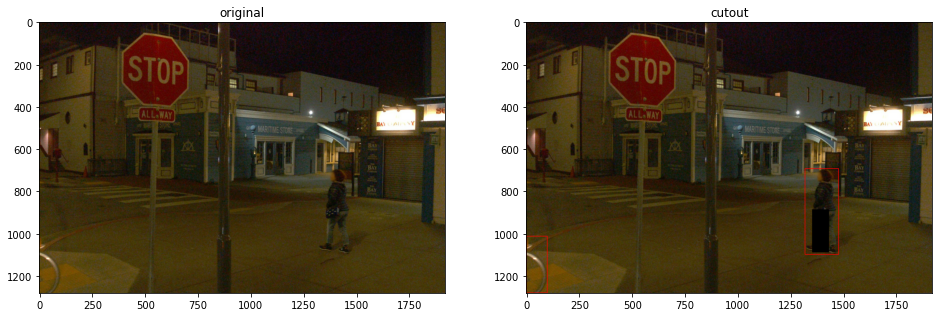

In [42]:
dummy = image.copy()
for obj in gt_boxes:
    cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (255, 0, 0), thickness = 2)
    
amount = 0.5
ran_select = random.sample(gt_boxes, round(amount*len(gt_boxes)))
mask_set = []

for box in ran_select:
    obj_name = box[0]
    x1 = int(box[1])
    y1 = int(box[2])
    x2 = int(box[3])
    y2 = int(box[4])
    
    mask_w = int((x2 - x1)*0.5)
    mask_h = int((y2 - y1)*0.5)
    mask_x1 = random.randint(x1, x2 - mask_w)
    mask_y1 = random.randint(y1, y2 - mask_h)
    
    mask_x2 = mask_x1 + mask_w
    mask_y2 = mask_y1 + mask_h
    
    cv2.rectangle(dummy, (mask_x1, mask_y1), (mask_x2, mask_y2), (0, 0, 0), thickness=-1)
    
plt.figure(figsize=(16,10))
plt.subplot(121), plt.gca().set_title("original"), plt.imshow(image)
plt.subplot(122), plt.gca().set_title("cutout"), plt.imshow(dummy)
plt.show()

# Random Crop

In [65]:
def random_crop_with_anno(img_path, anno_path, scale):
    
    # Crop image
    img = cv2.imread(img_path)
    height, width = int(img.shape[0]*scale), int(img.shape[1]*scale)
    x = random.randint(0, img.shape[1] - int(width))
    y = random.randint(0, img.shape[0] - int(height))
    cropped = img[y:y+height, x:x+width]
    resized = cv2.resize(cropped, (img.shape[1], img.shape[0]))
    
    # Modify annotation
    new_boxes = []
    gt_boxes = file_lines_to_list(anno_path)
    for box in gt_boxes:
        obj_name = box[0]
        x1 = int(box[1])
        y1 = int(box[2])
        x2 = int(box[3])
        y2 = int(box[4])
        x1, x2 = x1-x, x2-x
        y1, y2 = y1-y, y2-y
        x1, y1, x2, y2 = x1/scale, y1/scale, x2/scale, y2/scale
        new_boxes.append([obj_name, x1, y1, x2, y2])
    
    return resized, new_boxes

(1280, 1920, 3)


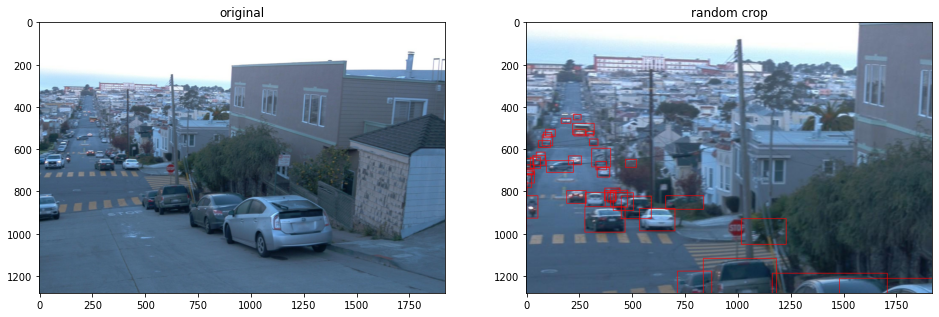

In [388]:
img_path = f"../datasets/waymo/data/{data_type}/{img_name}.jpg"
anno_path = f"../datasets/waymo/data/waymo_{data_type}_GT/{img_name}.txt"
scale = 0.5

resized, new_boxes = random_crop_with_anno(img_path, anno_path, scale)

dummy = resized.copy()

for obj in new_boxes:
    cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 0, 255), thickness = 2)

plt.figure(figsize=(16,10))
plt.subplot(121), plt.gca().set_title("original"), plt.imshow(image)
plt.subplot(122), plt.gca().set_title("random crop"), plt.imshow(rgb_display(dummy))
print(image.shape)
plt.show()

# Different ColorJitter: brightness, contrast, saturation

(1280, 1920, 3)


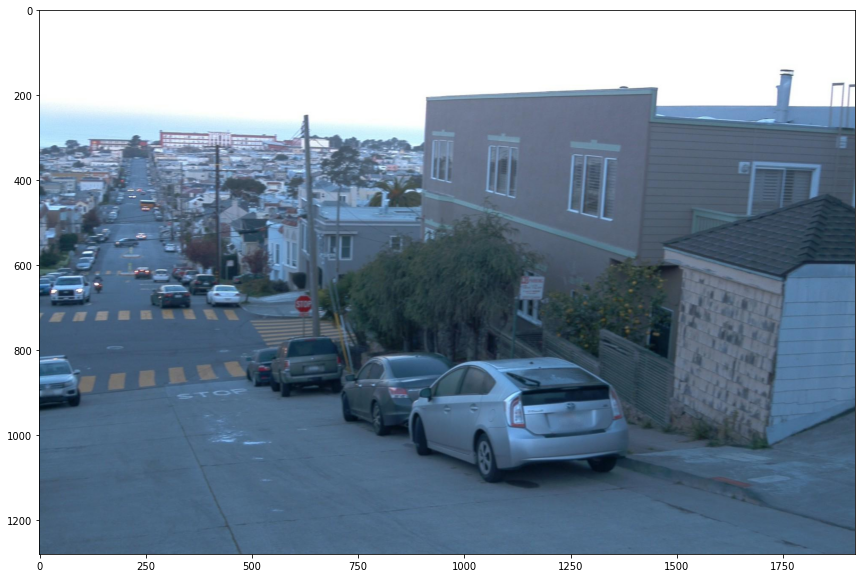

In [138]:
img_path = f"../datasets/waymo/data/{data_type}/{img_name}.jpg"
img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,10))
plt.imshow(rgb_display(img))
print(img.shape)
plt.show()

In [324]:
def color_jitter(img, cj_type="b"):
    
    if cj_type == "b":
        value = random.randint(-50, 50)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value

        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "s":
        value = random.randint(-50, 50)
        
        
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value

        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(30, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        
        return img

In [331]:
img_path = f"../datasets/waymo/data/{data_type}/{img_name}.jpg"
img = cv2.imread(img_path)

(1280, 1920, 3)


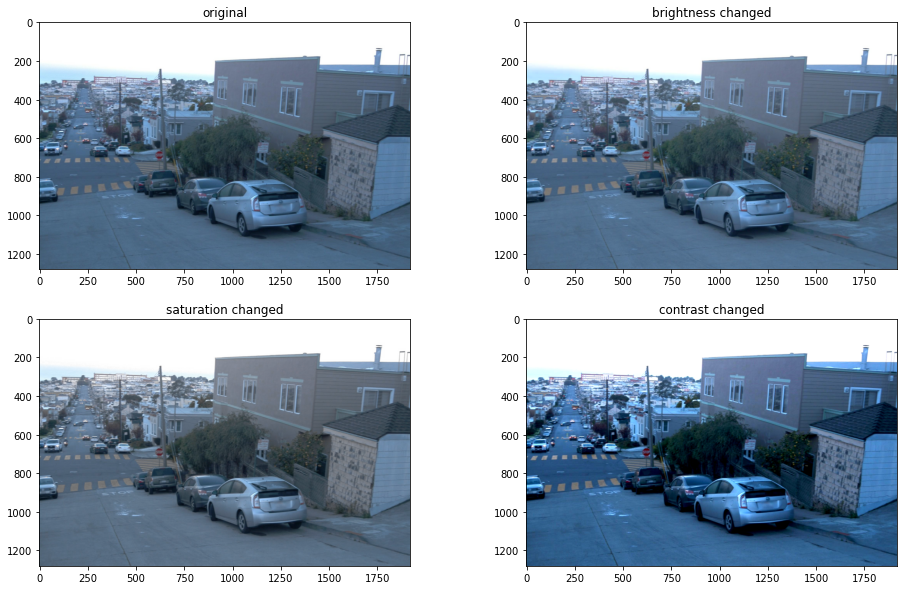

In [338]:
b_img = color_jitter(img, cj_type="b")
s_img = color_jitter(img, cj_type="s")
c_img = color_jitter(img, cj_type="c")

plt.figure(figsize=(16,10))
plt.subplot(221), plt.gca().set_title("original"), plt.imshow(rgb_display(img))
plt.subplot(222), plt.gca().set_title("brightness changed"), plt.imshow(rgb_display(b_img))
plt.subplot(223), plt.gca().set_title("saturation changed"), plt.imshow(rgb_display(s_img))
plt.subplot(224), plt.gca().set_title("contrast changed"), plt.imshow(rgb_display(c_img))
print(img.shape)
plt.show()

# Noise: Gaussian, salt & pepper

In [130]:
def noisy(image, noise_type):
    
    if noise_type == "gauss":
        mean=0
        st=0.7
        gauss = np.random.normal(mean,st,image.shape)
        gauss = gauss.astype('uint8')
        image = cv2.add(image,gauss)
        return image
    
    elif noise_type == "sp":
        prob = 0.05
        if len(image.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(image.shape[:2])
        image[probs < (prob / 2)] = black
        image[probs > 1 - (prob / 2)] = white
        return image

(1280, 1920, 3)


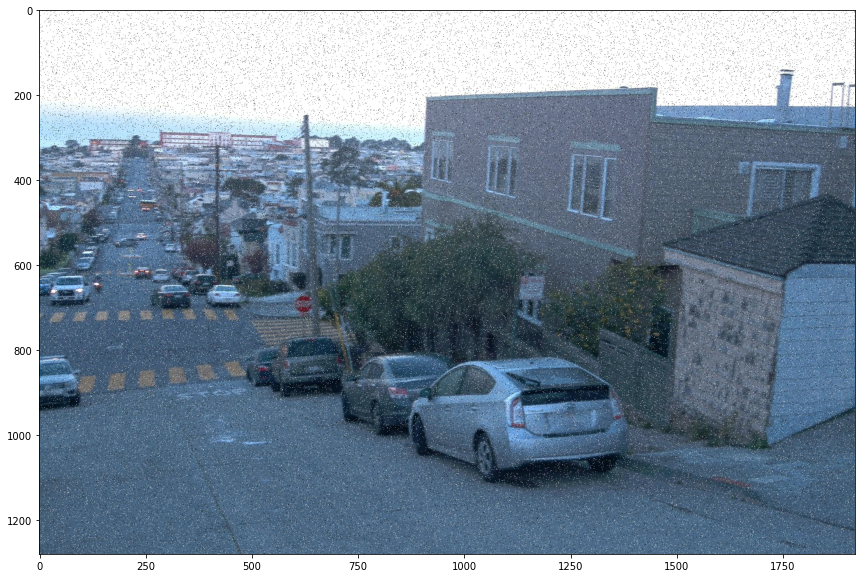

In [133]:
img_path = f"../datasets/waymo/data/{data_type}/{img_name}.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# noise_type = "gauss"
noise_type = "sp"

noise_img = noisy(img, noise_type)

print(img.shape)
plt.figure(figsize=(16,10))
plt.imshow(noise_img)
plt.show()

# Filters

(1280, 1920, 3)


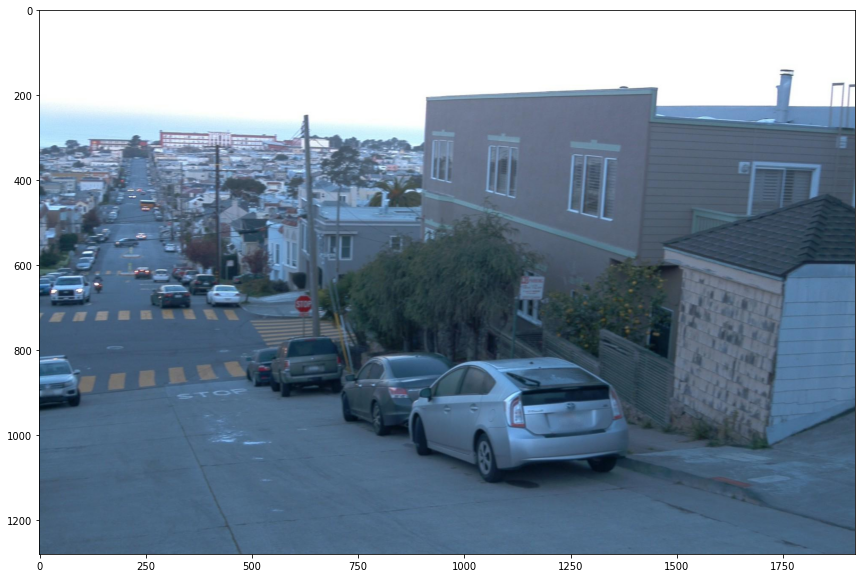

In [339]:
img_path = f"../datasets/waymo/data/{data_type}/{img_name}.jpg"
img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,10))
plt.imshow(rgb_display(img))
print(img.shape)
plt.show()

In [379]:
def filters(img, f_type = "blur"):
    if f_type == "blur":
        fsize = 9
        return cv2.blur(img,(fsize,fsize))
    
    elif f_type == "gaussian":
        fsize = 9
        return cv2.GaussianBlur(img, (fsize, fsize), 0)
    
    elif f_type == "median":
        fsize = 9
        return cv2.medianBlur(img, fsize)

(1280, 1920, 3)


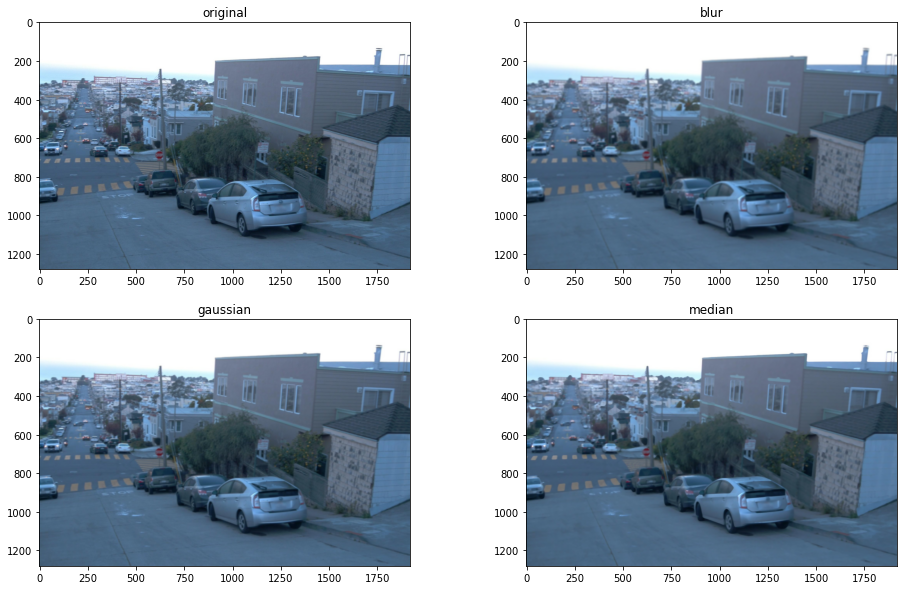

In [383]:
blur_img = filters(img, f_type = "blur")
gauss_img = filters(img, f_type = "gaussian")
median_img = filters(img, f_type = "median")

plt.figure(figsize=(16,10))
plt.subplot(221), plt.gca().set_title("original"), plt.imshow(rgb_display(img))
plt.subplot(222), plt.gca().set_title("blur"), plt.imshow(rgb_display(blur_img))
plt.subplot(223), plt.gca().set_title("gaussian"), plt.imshow(rgb_display(gauss_img))
plt.subplot(224), plt.gca().set_title("median"), plt.imshow(rgb_display(median_img))
print(img.shape)
plt.show()